In [20]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
import utils

In [10]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=10000)
print('Maximum Labels: ', max(train_labels))

Maximum Labels:  45


/home/sibti/anaconda3/envs/ttf_gpu/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/sibti/anaconda3/envs/ttf_gpu/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [11]:
# check dataset
w_index = keras.datasets.reuters.get_word_index()
reverse_widx = dict([(key, val) for val, key in w_index.items()])

In [12]:
print('Train X')
print(' '.join([reverse_widx.get(i-3, '?') for i in train_data[0] ]))
print('Train Y')
print(train_labels[0])

Train X
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
Train Y
3


In [13]:
# one-hot encode data
def vectorize_data(seqs, dims=10000):
    x_train = np.zeros(shape=(len(seqs), dims))
    for i, seq in enumerate(seqs):
        x_train[i, seq] = 1
    return x_train

In [14]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [15]:
x_val = x_train[:1000]
y_val = y_train[:1000]
xp_train = x_train[1000:]
yp_train = y_train[1000:]

In [16]:
# model should have more units than number of classes
model = models.Sequential([
    Dense(64, activation='relu'),
    Dense(98, activation='relu'),
    Dense(46, activation='softmax'),
])
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
)

In [17]:
hist = model.fit(
    xp_train,
    yp_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 0s 17ms/step - loss: 2.3861 - val_loss: 1.5625
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.3076 - val_loss: 1.2516
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0056 - val_loss: 1.1006
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7938 - val_loss: 1.0856

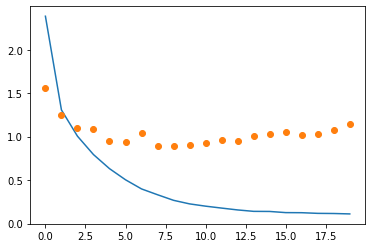

In [24]:
utils.plot_losses(hist, 20)

In [26]:
# if there is overfitting  train for less epochs
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.2658


1.2657697200775146

In [35]:
#
val_num = 2
pred = model.predict(x_test)
pred_a = pred[val_num]
np.argmax(pred_a), test_labels[val_num]

(1, 1)